Intro to Machine Learning Homework 1 Bryce Readyhough ID-801005029

# # Question 1a

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading in housing data from the provided CSV file

In [2]:
housingData = pd.DataFrame(pd.read_csv('Housing.csv'))
numRows = len(housingData)
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The data above contains several datapoints which are boolean yes or no. For a linear regression line these will need to be converted into numeric 1s or 0s. These can be mapped using an xmap. 

The dataset provided already has the data categorized so each variable does not need to be split.

In [3]:
mapVars = ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea']

def binaryMap(x):
    return x.map({"yes" : 1, "no" : 0})

housingData[mapVars] = housingData[mapVars].apply(binaryMap)

housingData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


For this model 70% of the data will be used for training, and 30% will be used as test data. The data will be split randomly into 2 sets, the first being the training set containing 70% of the original data, and the second being the test set containing 30% of the original data.

In [4]:
np.random.seed(2)
trainingSet, testSet = train_test_split(housingData, train_size = 0.7, test_size = 0.3, random_state = 
np.random.randint(1), shuffle = 0)

For this model the price of the house will be modeled using the following data types:
- area
- number of bedrooms
- number of bathrooms
- number of stories
- number of parking spaces

The price of the house will be considered the output or dependent variable (Y). The training and test sets are then reduced to only contain these variables.

In [5]:
model1_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
model1_train = trainingSet[model1_vars]
model1_test = testSet[model1_vars]
model1_train_length = len(model1_train)
print(model1_train_length)
model1_test_length = len(model1_test)
print(model1_test_length)
model1_train.head()

381
164


,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


Both the training and testing sets are then converted into 2 Matrices. One containing the X values and one containing the Y values.

In [6]:
model1_X0_train = np.ones((model1_train_length, 1))
model1_X1_train = model1_train.values[:, 0] #area
model1_X2_train = model1_train.values[:, 1] #bedrooms
model1_X3_train = model1_train.values[:, 2] #bathrooms
model1_X4_train = model1_train.values[:, 3] #stories
model1_X5_train = model1_train.values[:, 4] #parking
model1_Y_train = model1_train.values[:, 5] #price

model1_X0_test = np.ones((model1_test_length, 1))
model1_X1_test = model1_test.values[:, 0] #area
model1_X2_test = model1_test.values[:, 1] #bedrooms
model1_X3_test = model1_test.values[:, 2] #bathrooms
model1_X4_test = model1_test.values[:, 3] #stories
model1_X5_test = model1_test.values[:, 4] #parking
model1_Y_test = model1_test.values[:, 5] #price

The X sets are then combined into 5xnumRows matrices. The first column is the X0 place containing only ones.

In [7]:
model1_X1_train_1 = model1_X1_train.reshape((model1_train_length, 1))
model1_X2_train_1 = model1_X2_train.reshape((model1_train_length, 1))
model1_X3_train_1 = model1_X3_train.reshape((model1_train_length, 1))
model1_X4_train_1 = model1_X4_train.reshape((model1_train_length, 1))
model1_X5_train_1 = model1_X5_train.reshape((model1_train_length, 1))

model1_X1_test_1 = model1_X1_test.reshape((model1_test_length, 1))
model1_X2_test_1 = model1_X2_test.reshape((model1_test_length, 1))
model1_X3_test_1 = model1_X3_test.reshape((model1_test_length, 1))
model1_X4_test_1 = model1_X4_test.reshape((model1_test_length, 1))
model1_X5_test_1 = model1_X5_test.reshape((model1_test_length, 1))

model1_X_train = np.hstack((model1_X0_train, model1_X1_train_1, model1_X2_train_1, model1_X3_train_1, model1_X4_train_1, model1_X5_train_1))
model1_X_test = np.hstack((model1_X0_test, model1_X1_test_1, model1_X2_test_1, model1_X3_test_1, model1_X4_test_1, model1_X5_test_1))

print(model1_X_train[:5])
print(model1_X_test[:5])

[[1.000e+00 4.500e+03 3.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 3.990e+03 3.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.320e+03 3.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.905e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 3.510e+03 3.000e+00 1.000e+00 3.000e+00 0.000e+00]]
[[1.00e+00 4.00e+03 3.00e+00 1.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 9.62e+03 3.00e+00 1.00e+00 1.00e+00 2.00e+00]
 [1.00e+00 3.46e+03 4.00e+00 1.00e+00 2.00e+00 0.00e+00]
 [1.00e+00 1.32e+04 2.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 3.66e+03 4.00e+00 1.00e+00 2.00e+00 0.00e+00]]


The first question doesn't require standardization or normalization. Defining basic cost and gradient descent functions:

In [8]:
def compute_cost(XVals, YVals, theta):
    numSamples = len(XVals)
    predictions = XVals.dot(theta) #Makes a prediction using the given values of they using 
                                   #the following equation: prediction = theta0 + theta1*X
    errors = np.subtract(predictions, YVals) #calculates the error from the prediction to the actual Y value
    sqrErrors = np.square(errors) #squaring the errors to make finding the minimum easier
    J = (1/(2 * numSamples)) * np.sum(sqrErrors)
    return J
def gradient_descent(training_XVals, training_YVals, testing_XVals, testing_YVals, theta, alpha, iterations):
    numSamples = len(training_XVals)
    training_loss_history = np.zeros(iterations) #stores the calculated cost for each iteration of the algorithm
    testing_loss_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = training_XVals.dot(theta) #tests the current theta value with each independent variable value
        errors = np.subtract(predictions, training_YVals)
        sum_delta = (alpha/numSamples) * (training_XVals.transpose().dot(errors));
        theta = theta - sum_delta; #updating the value of theta based on the new data
        training_loss_history[i] = compute_cost(training_XVals, training_YVals, theta) #logging the training cost to the cost history log
        testing_loss_history[i] = compute_cost(testing_XVals, testing_YVals, theta)
    return theta, training_loss_history, testing_loss_history

Defining the number of iterations and the alpha that will be used and creating memory for apha.

In [9]:
model1_theta = np.zeros(6)
model1_alpha = 0.0000000001
model1_iterations = 1000

In [10]:
model1_initial_training_cost = compute_cost(model1_X_train, model1_Y_train, model1_theta)
print(model1_initial_training_cost)

13118565517688.451


In [11]:
model1_theta, model1_cost_history, model1_testLoss_history = gradient_descent(model1_X_train, model1_Y_train, model1_X_test, model1_Y_test, model1_theta, model1_alpha, model1_iterations)
print(model1_cost_history[:5])
model1_final_training_cost = compute_cost(model1_X_train, model1_Y_train, model1_theta)
print('Model 1 Final Training Set Cost: ', model1_final_training_cost)

[1.30508916e+13 1.29836171e+13 1.29167396e+13 1.28502568e+13
 1.27841664e+13]
Model 1 Final Training Set Cost:  1682418252640.2073


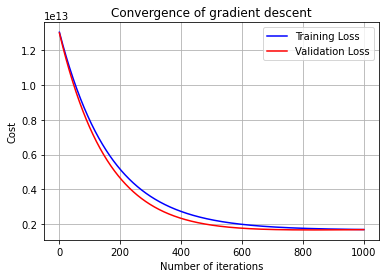

In [17]:
plt.plot(range(1, model1_iterations + 1), model1_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model1_iterations + 1), model1_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 1b

For the second question the same data will be used. The data will not be not be standardized. This time the following datapoints will be used for the model:
- Area
- Bedrooms
- Bathrooms
- Stories
- Mainroad 
- Guestroom
- Basement
- Hotwaterheating
- Airconditioning
- Parking
- Prefarea

In [19]:
model2_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
model2_train = trainingSet[model2_vars]
model2_test = testSet[model2_vars]
model2_train_length = len(model2_train)
print(model2_train_length)
model2_test_length = len(model2_test)
print(model2_test_length)
model2_train.head()

381
164


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
454,3143000,4500,3,1,2,1,0,0,0,1,0,0
392,3500000,3990,3,1,2,1,0,0,0,0,0,0
231,4690000,4320,3,1,1,1,0,0,0,0,0,1
271,4340000,1905,5,1,2,0,0,1,0,0,0,0
250,4515000,3510,3,1,3,1,0,0,0,0,0,0


In [20]:
model2_Y_train = model2_train.values[:, 0] #price

model2_X0_train = np.ones((model2_train_length, 1))
model2_X1_train = model2_train.values[:, 1] #area
model2_X2_train = model2_train.values[:, 2] #bedrooms
model2_X3_train = model2_train.values[:, 3] #bathrooms
model2_X4_train = model2_train.values[:, 4] #stories
model2_X5_train = model2_train.values[:, 5] #mainroad
model2_X6_train = model2_train.values[:, 6] #guestroom
model2_X7_train = model2_train.values[:, 7] #basement
model2_X8_train = model2_train.values[:, 8] #hotwaterheating
model2_X9_train = model2_train.values[:, 9] #airconditioning
model2_X10_train = model2_train.values[:, 10] #parking
model2_X11_train = model2_train.values[:, 11] #prefarea

model2_Y_test = model2_test.values[:, 5] #price


model2_X0_test = np.ones((model2_test_length, 1))
model2_X1_test = model2_test.values[:, 1] #area
model2_X2_test = model2_test.values[:, 2] #bedrooms
model2_X3_test = model2_test.values[:, 3] #bathrooms
model2_X4_test = model2_test.values[:, 4] #stories
model2_X5_test = model2_test.values[:, 5] #mainroad
model2_X6_test = model2_test.values[:, 6] #guestroom
model2_X7_test = model2_test.values[:, 7] #basement
model2_X8_test = model2_test.values[:, 8] #hotwaterheating
model2_X9_test = model2_test.values[:, 9] #airconditioning
model2_X10_test = model2_test.values[:, 10] #parking
model2_X11_test = model2_test.values[:, 11] #prefarea

In [21]:
model2_X1_train_1 = model2_X1_train.reshape((model2_train_length, 1))
model2_X2_train_1 = model2_X2_train.reshape((model2_train_length, 1))
model2_X3_train_1 = model2_X3_train.reshape((model2_train_length, 1))
model2_X4_train_1 = model2_X4_train.reshape((model2_train_length, 1))
model2_X5_train_1 = model2_X5_train.reshape((model2_train_length, 1))
model2_X6_train_1 = model2_X6_train.reshape((model2_train_length, 1))
model2_X7_train_1 = model2_X7_train.reshape((model2_train_length, 1))
model2_X8_train_1 = model2_X8_train.reshape((model2_train_length, 1))
model2_X9_train_1 = model2_X9_train.reshape((model2_train_length, 1))
model2_X10_train_1 = model2_X10_train.reshape((model2_train_length, 1))
model2_X11_train_1 = model2_X11_train.reshape((model2_train_length, 1))

model2_X1_test_1 = model2_X1_test.reshape((model2_test_length, 1))
model2_X2_test_1 = model2_X2_test.reshape((model2_test_length, 1))
model2_X3_test_1 = model2_X3_test.reshape((model2_test_length, 1))
model2_X4_test_1 = model2_X4_test.reshape((model2_test_length, 1))
model2_X5_test_1 = model2_X5_test.reshape((model2_test_length, 1))
model2_X6_test_1 = model2_X6_test.reshape((model2_test_length, 1))
model2_X7_test_1 = model2_X7_test.reshape((model2_test_length, 1))
model2_X8_test_1 = model2_X8_test.reshape((model2_test_length, 1))
model2_X9_test_1 = model2_X9_test.reshape((model2_test_length, 1))
model2_X10_test_1 = model2_X10_test.reshape((model2_test_length, 1))
model2_X11_test_1 = model2_X11_test.reshape((model2_test_length, 1))

model2_X_train = np.hstack((model2_X0_train, model2_X1_train_1, model2_X2_train_1, model2_X3_train_1, model2_X4_train_1, model2_X5_train_1, model2_X6_train_1, model2_X7_train_1, model2_X8_train_1, model2_X9_train_1, model2_X10_train_1, model2_X11_train_1))
model2_X_test = np.hstack((model2_X0_test, model2_X1_test_1, model2_X2_test_1, model2_X3_test_1, model2_X4_test_1, model2_X5_test_1, model2_X6_test_1, model2_X7_test_1, model2_X8_test_1, model2_X9_test_1, model2_X10_test_1, model2_X11_test_1))

print(model2_X_train[:5])
print(model2_X_test[:5])

[[1.000e+00 4.500e+03 3.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.990e+03 3.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.320e+03 3.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 1.905e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.510e+03 3.000e+00 1.000e+00 3.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[1.00e+00 4.00e+03 3.00e+00 1.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 9.62e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 3.46e+03 4.00e+00 1.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 1.32e+04 2.00e+00 1.00e+

In [22]:
model2_theta = np.zeros(12)
model2_alpha = 0.0000000001
model2_iterations = 1000

In [23]:
model2_initial_training_cost = compute_cost(model2_X_train, model2_Y_train, model2_theta)
print(model2_initial_training_cost)

13118565517688.451
